<a href="https://colab.research.google.com/github/chohyungrae/Machine-Learning-Deep-Learning-Code-Learning/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C_Linear_Regression_%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[ 코드로 학습하는 머신러닝,딥러닝 ]**

학습에 사용되는 주요 프로그램

-> 파이썬,텐서플로어,캐라스,파이토치등

-> 참조사이트; https://woowabros.github.io/study/2018/08/01/linear_regression_qr.html

In [ ]:
'''
배달데이터 가정
# 배달거리, 배달시간 
[100m, 20min] 
[150m, 24min]
[300m, 36min]
[400m, 47min]
[130m, 22min]
[240m, 32min]
[350m, 47min]
[200m, 42min]
[100m, 21min]
[110m, 21min]
[190m, 30min]
[120m, 25min]
[130m, 18min]
[270m, 38min]
[255m, 28min]
'''


'\n배달데이터 가정\n# 배달거리, 배달시간 \n, 20min] \n, 24min]\n, 36min]\n, 47min]\n, 22min]\n, 32min]\n, 47min]\n, 42min]\n, 21min]\n, 21min]\n, 30min]\n, 25min]\n, 18min]\n, 38min]\n, 28min]\n'

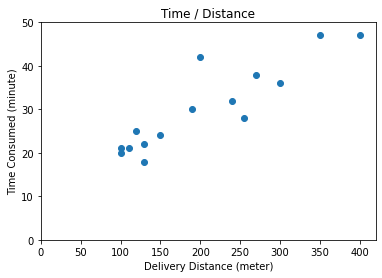

In [ ]:
#데이터를 시각화
#파이썬 Matplotlib을 사용하면 쉽게 그래프를 그려볼 수 있다.
import numpy as np 
from matplotlib import pyplot as plt 

data = np.array([[100, 20], 
		[150, 24], 
		[300, 36], 
		[400, 47], 
		[130, 22], 
		[240, 32],
		[350, 47], 
		[200, 42], 
		[100, 21], 
		[110, 21], 
		[190, 30], 
		[120, 25], 
		[130, 18], 
		[270, 38], 
		[255, 28]])

plt.scatter(data[:, 0], data[:, 1]) 
plt.title("Time / Distance")
plt.xlabel("Delivery Distance (meter)")
plt.ylabel("Time Consumed (minute)")
plt.axis([0, 420, 0, 50])
plt.show() 

#거리가 늘어남에 따라 시간도 비슷한 속도로 늘어나는 것을 볼 수 있습니다.

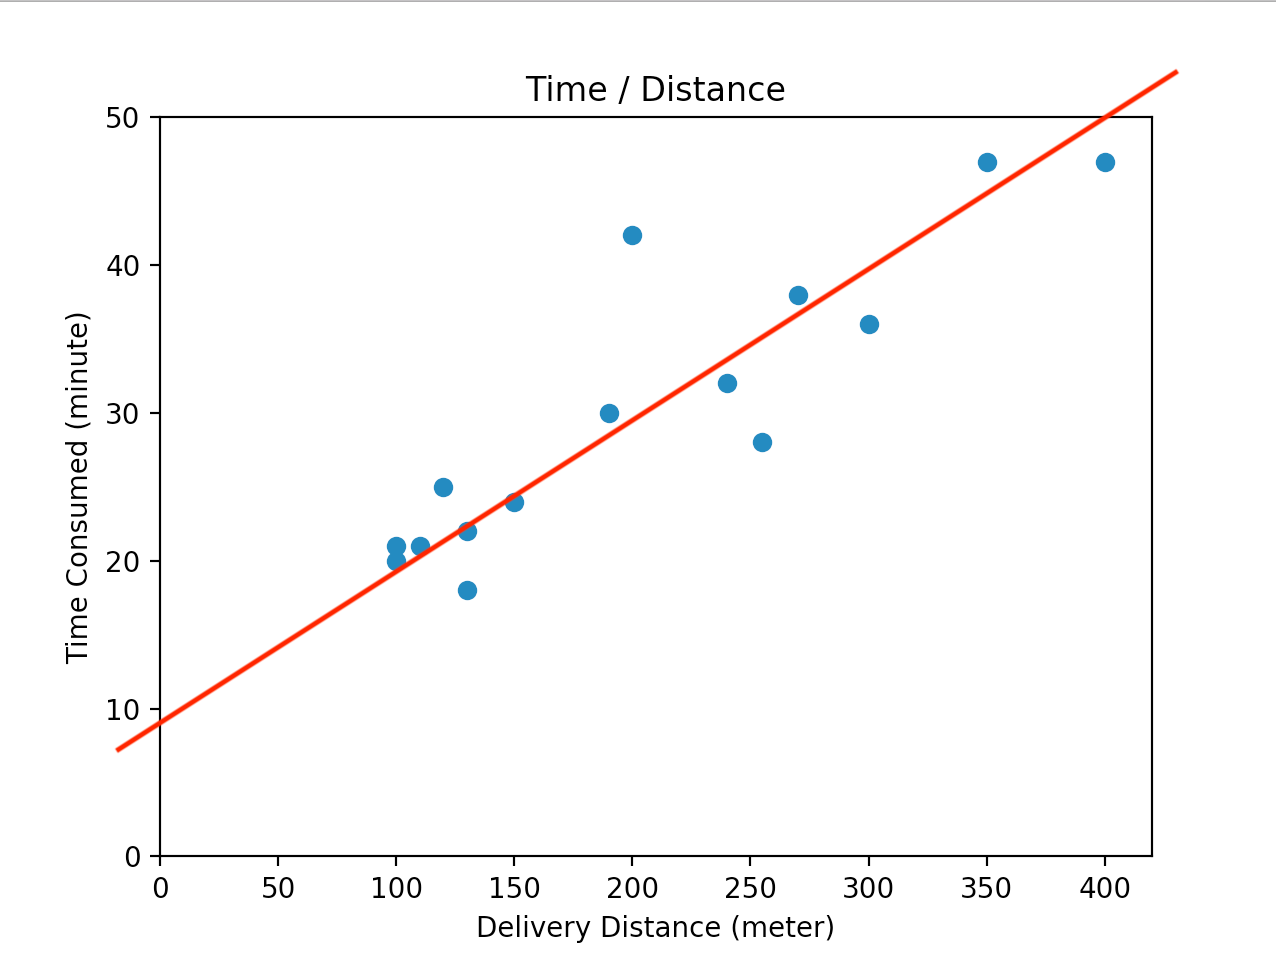

In [ ]:
#웹페이지 이미지 가져와서 내 폴더에 저장하기
import urllib.request
url = 'https://woowabros.github.io/img/2018-08-01/graph.png'
urllib.request.urlretrieve(url, 'graph.png')
print

# 화면에 출력
from IPython.display import Image
Image('graph.png')

In [ ]:
#크롤링한 이미지 사이즈 보기
from PIL import Image
i = Image.open('graph.png')
width , height = i.size
print (width, height)

1276 962


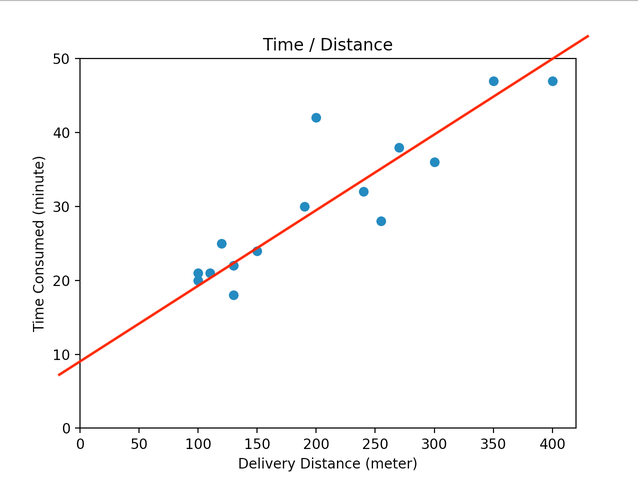

In [ ]:
#크롤링한 이미지 크기 조절
#resize가 1은 원래사이즈, 숫자가 높을수록 사이즈는 쭐어간다(2인경우 절반사이즈)
from PIL import Image
img = Image.open('graph.png') 
width, height = img.size
small = img.resize((width//2,height//2), Image.ANTIALIAS)
small.save('graph.png', 'png')

from IPython.display import Image
Image('graph.png')

#50m거리에서는 13? 14분정도 걸린다고 예상, 200m면 30분정도면 배달이 될 것 같네요.

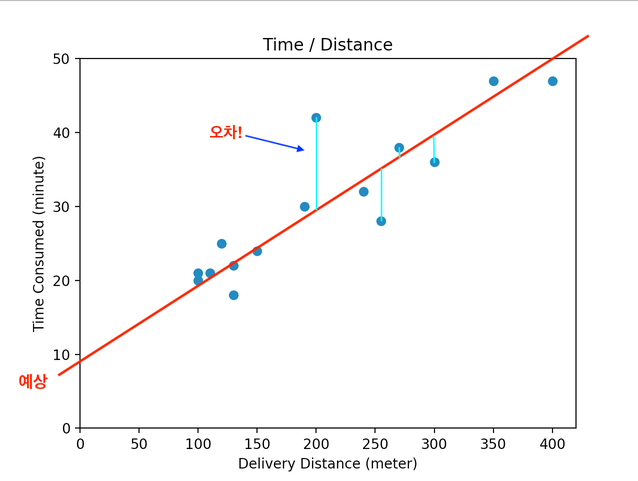

In [ ]:
#오차가 최소가 되는 선을 찾기
#예측 값과 실제 값 사이에는 차이가 발생하게 된다.
import urllib.request
url = 'https://woowabros.github.io/img/2018-08-01/graph2.png'
urllib.request.urlretrieve(url, 'graph2.png')
print

# 화면에 출력
from IPython.display import Image
Image('graph2.png')

#크롤링한 이미지 크기 조절
#resize가 1은 원래사이즈, 숫자가 높을수록 사이즈는 쭐어간다(2인경우 절반사이즈)
from PIL import Image
img = Image.open('graph2.png') 
width, height = img.size
small = img.resize((width//2,height//2), Image.ANTIALIAS)
small.save('graph2.png', 'png')

from IPython.display import Image
Image('graph2.png')

#점이 선에서 멀수록 오차가 큰 것
#따라서 목표는 오차 제곱의 합이 최소화 되는 선을 찾는 것=>[Linear Least Squares]

In [ ]:
#[Linear Least Squares]찾는 행렬식을 파이썬코드로 표현
#[하우스홀더 변환을 이용한 QR분해 구현
def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m) # Orthogonal transform so far
    R = A.copy() # Transformed matrix so far

    for j in range(n):
        # Find H = I - beta*u*u' to put zeros below R[j,j]
        x = R[j:, j]
        normx = np.linalg.norm(x)
        rho = -np.sign(x[0])
        u1 = x[0] - rho * normx
        u = x / u1
        u[0] = 1
        beta = -rho * u1 / normx

        R[j:, :] = R[j:, :] - beta * np.outer(u, u).dot(R[j:, :])
        Q[:, j:] = Q[:, j:] - beta * Q[:, j:].dot(np.outer(u, u))
        
    return Q, R

In [ ]:
'''
드디어! A=QR의 형태를 얻었으니 이걸 이용해 원래 풀고 싶었던 문제인 Ax≅b를 풀어 
배달거리에 따른 배달시간 예측모델을 만들어볼 수 있다!

파이썬 numpy를 사용해 간단하게 문제를 풀 수 있다.
'''
m, n = data.shape
A = np.array([data[:,0], np.ones(m)]).T
b = data[:, 1] 

Q, R = qr_householder(A) 
b_hat = Q.T.dot(b) 

R_upper = R[:n, :]
b_upper = b_hat[:n]  

print(R_upper, b_upper) 

x = np.linalg.solve(R_upper, b_upper) 
slope, intercept = x 



[[-8.64248228e+02 -3.52329331e+00]
 [-6.25193280e-14 -1.60823016e+00]] [-119.68783576  -18.22167606]


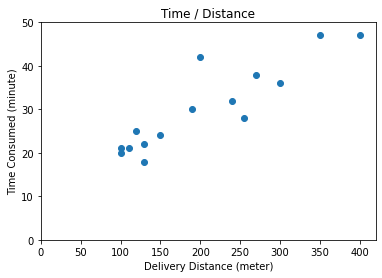

In [ ]:
#데이터를 시각화
#[slope: 0.092, intercept: 11.33]
#배달시간을 얼추 예상해볼 수 있는 모델이 생겼네요. 
#f(d)=0.092d+11.33으로 거리 d에 따라 시간을 예상해볼 수 있다.
'''
물론 실제 배달시간은 배달거리 이외에도 음식 종류, 날씨, 교통상황, 배달원이 누군지 등등,
여러 변수의 영향을 받게 되므로 실제로는 더 복잡한 방식으로 예측하고 있다. 
Linear Least Squares 문제를 파이썬으로 풀어보았습니다.
'''
plt.scatter(data[:, 0], data[:, 1]) 
plt.title("Time / Distance")
plt.xlabel("Delivery Distance (meter)")
plt.ylabel("Time Consumed (minute)")
plt.axis([0, 420, 0, 50])
plt.show() 